In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from path_explain import utils
utils.set_up_environment(visible_devices='0')

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from train import load_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = load_mnist()

reshaped_x_train = np.reshape(x_train, (x_train.shape[0], -1))
pca_model = PCA()
pca_model.fit(reshaped_x_train)

transformed_x_train = pca_model.transform(reshaped_x_train)

In [5]:
pca_components = pca_model.components_

In [6]:
first_component = pca_components[0]
first_component = first_component.reshape((28, 28))

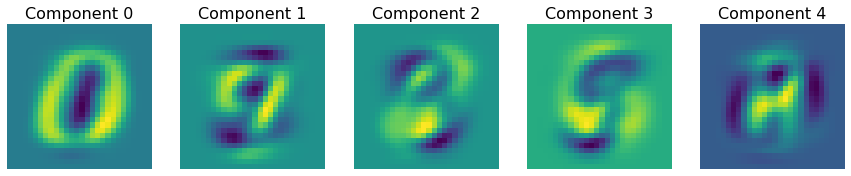

In [7]:
num_components_to_show = 5
fig, axs = plt.subplots(1, num_components_to_show, figsize=(3 * num_components_to_show, 3))
for i in range(num_components_to_show):
    axs[i].imshow(pca_components[i].reshape((28, 28)))
    axs[i].axis('off')
    axs[i].set_title('Component {}'.format(i), fontsize=16)

In [8]:
original_image = x_train[0, :, :, 0]
reconstructed_image = np.dot(pca_components.T, transformed_x_train[0]) + pca_model.mean_
reconstructed_image = reconstructed_image.reshape((28, 28))

In [9]:
np.allclose(reconstructed_image, original_image)

True

Text(0.5, 1.0, 'Reconstructed Image')

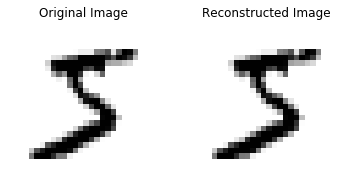

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(original_image, cmap='gray_r')
_ = axs[0].axis('off')
axs[0].set_title('Original Image')
axs[1].imshow(reconstructed_image, cmap='gray_r')
_ = axs[1].axis('off')
axs[1].set_title('Reconstructed Image')

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784)))
dense_layer = tf.keras.layers.Dense(units=784,
                                    activation=None,
                                    use_bias=True,
                                    kernel_initializer=tf.keras.initializers.Constant(pca_components),
                                    bias_initializer=tf.keras.initializers.Constant(pca_model.mean_))
model.add(dense_layer)

In [12]:
tf_reconstruction = model(transformed_x_train[0:1])
tf_reconstruction = tf_reconstruction[0]
tf_reconstruction = tf_reconstruction.numpy().reshape((28, 28))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Text(0.5, 1.0, 'Reconstructed Image')

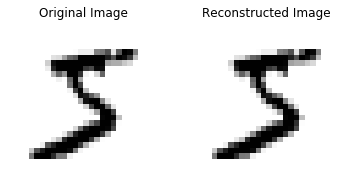

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[0].imshow(original_image, cmap='gray_r')
_ = axs[0].axis('off')
axs[0].set_title('Original Image')
axs[1].imshow(tf_reconstruction, cmap='gray_r')
_ = axs[1].axis('off')
axs[1].set_title('Reconstructed Image')

In [14]:
np.allclose(original_image, tf_reconstruction, atol=1e-6)

True

In [15]:
second_model = tf.keras.models.load_model('model.h5')

In [20]:
first_model = tf.keras.models.Sequential()
first_model.add(tf.keras.layers.Input(shape=(784)))
dense_layer = tf.keras.layers.Dense(units=784,
                                    activation=None,
                                    use_bias=True,
                                    kernel_initializer=tf.keras.initializers.Constant(pca_components),
                                    bias_initializer=tf.keras.initializers.Constant(pca_model.mean_))
first_model.add(dense_layer)
first_model.add(tf.keras.layers.Reshape((28, 28, 1)))

In [21]:
first_model.add(second_model)

In [23]:
first_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
sequential (Sequential)      (None, 10)                3245834   
Total params: 3,861,274
Trainable params: 3,859,034
Non-trainable params: 2,240
_________________________________________________________________
